# Event Rate plots

These are figures 5, 6, 7, 9, 10, 11, 13, 14.

## initial imports

In [22]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy import integrate

In [23]:
# Plotting settings
# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.linewidth'] = 2

colours = {"empirical":"#e7298a", "millimillennium":"#1b9e77", "EAGLE":"#7570b3", "TNG":"#d95f02"}

def set_axis(ax):
    # Set the minor and major ticks on both axes
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
    # set the location of the ticks
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

In [24]:
path = "../data/"

In [25]:
data = h5py.File(f"{path}/data.h5", "r")
event_rates = data['event_rates']
observations = data['observations']

In [5]:
h = event_rates.attrs['h']
omega_M = event_rates.attrs['omega_M']
omega_L = event_rates.attrs['omega_L']

In [6]:
# The event rates from different SFH have the same redshift bins
redshift = event_rates.attrs['event_redshift'][:-1]

In [7]:
SFH_names = ["empirical", "millimillennium", "EAGLE", "TNG"]

# Type Ia (Figure 5)

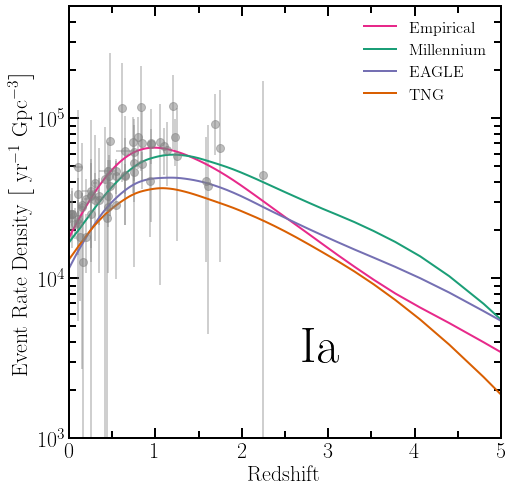

In [8]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0, 0, 1, 1])

set_axis(ax)

for SFH in SFH_names:
    if SFH == "empirical":
        ax.plot(redshift, np.sum(event_rates[SFH]["Ia"], axis=0), label="Empirical", color=colours[SFH], lw=2)
    elif SFH == "millimillennium":
        ax.plot(redshift, np.sum(event_rates[SFH]["Ia"], axis=0), label="Millennium", color=colours[SFH], lw=2)
    else:
        ax.plot(redshift, np.sum(event_rates[SFH]["Ia"], axis=0), label=SFH, color=colours[SFH], lw=2)

    
ax.legend(frameon=False, fontsize=16, loc=1)
ax.set_xlabel("Redshift")
ax.set_ylabel(r"Event Rate Density $\left[\textrm{ yr}^{-1} \textrm{ Gpc}^{-3}\right]$")
ax.set_yscale("log")
ax.set_xlim(0,5)
ax.set_ylim(1e3, 5e5)

obs = observations['Ia']
ax.errorbar(np.array(obs['mean_z']),
            np.array(obs['rate'])*h**3, 
            xerr=[obs['lower_z'],obs['upper_z']],
            yerr=[obs['lower_rate']*h**3, obs['upper_rate']*h**3],
            fmt="o",
            ms=8,
            alpha=0.5,
            color="grey")

ax.text(2.7, 3e3, r"Ia", fontsize=50)

plt.savefig("images/png/TypeIa_obs.png", dpi=150, bbox_inches='tight')
plt.savefig("images/pdf/TypeIa_obs.pdf", bbox_inches='tight')

# CCSN (Figure 6)

In [9]:
CCSN = {}

CCSN["millimillennium"] =  np.sum(event_rates['millimillennium']["II"],axis=0)
CCSN["millimillennium"] += np.sum(event_rates['millimillennium']["IIP"],axis=0)
CCSN["millimillennium"] += np.sum(event_rates['millimillennium']["Ib"],axis=0)
CCSN["millimillennium"] += np.sum(event_rates['millimillennium']["Ic"],axis=0)

CCSN["TNG"] =  np.sum(event_rates['TNG']["II"],axis=0)
CCSN["TNG"] += np.sum(event_rates['TNG']["IIP"],axis=0)
CCSN["TNG"] += np.sum(event_rates['TNG']["Ib"],axis=0)
CCSN["TNG"] += np.sum(event_rates['TNG']["Ic"],axis=0)

CCSN["EAGLE"] =  np.sum(event_rates['EAGLE']["II"],axis=0)
CCSN["EAGLE"] += np.sum(event_rates['EAGLE']["IIP"],axis=0)
CCSN["EAGLE"] += np.sum(event_rates['EAGLE']["Ib"],axis=0)
CCSN["EAGLE"] += np.sum(event_rates['EAGLE']["Ic"],axis=0)

CCSN["empirical"] =  np.sum(event_rates['empirical']["II"][:], axis=0)
CCSN["empirical"] += np.sum(event_rates['empirical']["IIP"][:], axis=0)
CCSN["empirical"] += np.sum(event_rates['empirical']["Ib"][:], axis=0)
CCSN["empirical"] += np.sum(event_rates['empirical']["Ic"][:], axis=0)

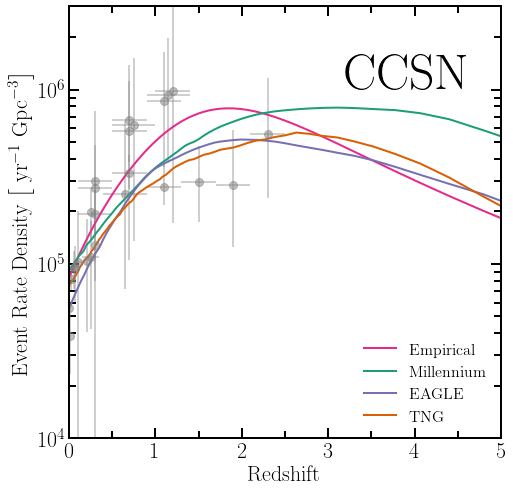

In [10]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0, 0, 1, 1])

set_axis(ax)

for SFH in SFH_names:
    if SFH == "empirical":
        ax.plot(redshift, CCSN[SFH], label="Empirical", color=colours[SFH], lw=2)
    elif SFH == "millimillennium":
        ax.plot(redshift, CCSN[SFH], label="Millennium", color=colours[SFH], lw=2)
    else:
        ax.plot(redshift, CCSN[SFH], label=SFH, color=colours[SFH], lw=2)

ax.legend(frameon=False, fontsize=16, loc=4)
ax.set_xlabel("Redshift")
ax.set_ylabel(r"Event Rate Density $\left[\textrm{ yr}^{-1} \textrm{ Gpc}^{-3}\right]$")
ax.set_yscale("log")
ax.set_xlim(0,5)
ax.set_ylim(1e4, 3e6)

obs = observations['CCSN']
ax.errorbar(np.array(obs['mean_z']),
            np.array(obs['rate'])*h**3, 
            xerr=[obs['lower_z'],obs['upper_z']],
            yerr=[obs['lower_rate']*h**3, obs['upper_rate']*h**3],
            fmt="o",
            ms=8,
            alpha=0.5,
            color="grey")

plt.text(3.2, 1e6, r"CCSN", fontsize=50)

#ax.legend(bbox_to_anchor=(1.0, 0), loc='lower right', frameon=False, fontsize=16, ncol=2)

plt.savefig("images/pdf/CCSN_obs.pdf", bbox_inches='tight', transparent=True)
plt.savefig("images/png/CCSN_obs.png", dpi=150, bbox_inches='tight', transparent=True)

# CCSN subtypes (Figure 7)
- SESN
- II + IIP
- Ib
- Ic

In [11]:
# fraction of Type IIb of Type II events (without Type IIP)
IIb_II_fraction = 0.6541

In [12]:
II_rates = {}
SE_rates = {}

II_rates["millimillennium"] = np.sum(event_rates['millimillennium']['II'],  axis=0) + \
                              np.sum(event_rates['millimillennium']['IIP'], axis=0)
SE_rates["millimillennium"] = np.sum(event_rates['millimillennium']['Ib'][:] + \
                                     event_rates['millimillennium']['Ic'][:] + \
                                     event_rates['millimillennium']["II"][:] * IIb_II_fraction, axis=0)

II_rates["EAGLE"] = np.sum(event_rates['EAGLE']['II'],  axis=0) + \
                    np.sum(event_rates['EAGLE']['IIP'], axis=0)
SE_rates["EAGLE"] = np.sum(event_rates['EAGLE']['Ib'][:] + \
                           event_rates['EAGLE']['Ic'][:] + \
                           event_rates['EAGLE']["II"][:] * IIb_II_fraction, axis=0)


II_rates["TNG"] = np.sum(event_rates['TNG']['II'],  axis=0) + \
                  np.sum(event_rates['TNG']['IIP'], axis=0)
SE_rates["TNG"] = np.sum(event_rates['TNG']['Ib'][:] + \
                         event_rates['TNG']['Ic'][:] + \
                         event_rates['TNG']["II"][:] * IIb_II_fraction, axis=0)

II_rates["empirical"] = np.sum(event_rates['empirical']['II'],  axis=0) + \
                        np.sum(event_rates['empirical']['IIP'], axis=0)
SE_rates["empirical"] = np.sum(event_rates['empirical']['Ib'][:] + \
                               event_rates['empirical']['Ic'][:] + \
                               event_rates['empirical']["II"][:] * IIb_II_fraction, axis=0)

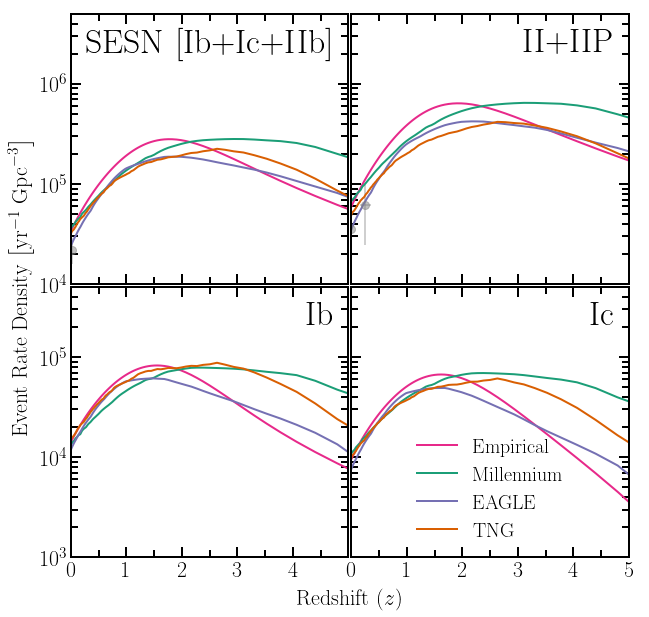

In [13]:
#fig = plt.figure(figsize=(12,12))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
plt.subplots_adjust(wspace=0.01, hspace=0.01)



# SESN plots
ax = axes[0,0]

set_axis(ax)

for SFH in SFH_names:
    if SFH == "empirical":
        ax.plot(redshift, SE_rates[SFH], label="Empirical", color=colours[SFH], lw=2)
    elif SFH == "millimillennium":
        ax.plot(redshift, SE_rates[SFH], label="Millennium", color=colours[SFH], lw=2)
    else:
        ax.plot(redshift, SE_rates[SFH], label=SFH, color=colours[SFH], lw=2)

ax.set_xticklabels([])
ax.set_xlim(0,5)
ax.set_ylim(1e4, 5e6)
ax.set_yscale('log')
ax.text(0.95, 0.95, r"SESN [Ib+Ic+IIb]",horizontalalignment="right", verticalalignment="top", fontsize=34, transform=ax.transAxes)

obs = observations['SESN']
ax.errorbar(np.array(obs['mean_z']),
            np.array(obs['rate'])*h**3, 
            xerr=[obs['lower_z'],obs['upper_z']],
            yerr=[obs['lower_rate']*h**3, obs['upper_rate']*h**3],
            fmt="o",
            ms=8,
            alpha=0.5,
            color="grey")

#ax.errorbar([z],[r*1e5],yerr=[[(0.064*(h/0.7)**3)*1e5], [(0.081*(h/0.7)**3)*1e5]], fmt="o", ms=10, color="grey")

# Type II (+IIP) Plot
ax = axes[0,1]

set_axis(ax)
for SFH in SFH_names:
    if SFH == "empirical":
        ax.plot(redshift, II_rates[SFH], label="Empirical", color=colours[SFH], lw=2)
    elif SFH == "millimillennium":
        ax.plot(redshift, II_rates[SFH], label="Millennium", color=colours[SFH], lw=2)
    else:
        ax.plot(redshift, II_rates[SFH], label=SFH, color=colours[SFH], lw=2)

ax.set_xticklabels([])
ax.set_xlim(0,5)
ax.set_ylim(1e4, 5e6)
ax.set_yscale('log')
ax.yaxis.set_ticklabels([])
ax.text(0.95, 0.95, r"II+IIP",horizontalalignment="right", verticalalignment="top", fontsize=34, transform=ax.transAxes)

obs = observations['II']
ax.errorbar(np.array(obs['mean_z']),
            np.array(obs['rate'])*h**3, 
            xerr=[obs['lower_z'],obs['upper_z']],
            yerr=[obs['lower_rate']*h**3, obs['upper_rate']*h**3],
            fmt="o",
            ms=8,
            alpha=0.5,
            color="grey")


# Type Ib
ax = axes[1,0]

set_axis(ax)

for SFH in SFH_names:
    if SFH == "empirical":
        ax.plot(redshift, np.sum(event_rates[SFH]["Ib"], axis=0), label="Empirical", color=colours[SFH], lw=2)
    elif SFH == "millimillennium":
        ax.plot(redshift, np.sum(event_rates[SFH]["Ib"], axis=0), label="Millennium", color=colours[SFH], lw=2)
    else:
        ax.plot(redshift, np.sum(event_rates[SFH]["Ib"], axis=0), label=SFH, color=colours[SFH], lw=2)


ax.set_xlim(0,4.9999)
ax.set_ylim(1e3, 5e5)
ax.set_yscale('log')
ax.text(0.95, 0.95, r"Ib",horizontalalignment="right", verticalalignment="top", fontsize=34, transform=ax.transAxes)

ax = axes[1,1]

set_axis(ax)

for SFH in SFH_names:
    if SFH == "empirical":
        ax.plot(redshift, np.sum(event_rates[SFH]["Ic"], axis=0), label="Empirical", color=colours[SFH], lw=2)
    elif SFH == "millimillennium":
        ax.plot(redshift, np.sum(event_rates[SFH]["Ic"], axis=0), label="Millennium", color=colours[SFH], lw=2)
    else:
        ax.plot(redshift, np.sum(event_rates[SFH]["Ic"], axis=0), label=SFH, color=colours[SFH], lw=2)
        
ax.set_xlim(0,5)
ax.set_ylim(1e3, 5e5)
ax.set_yscale('log')
ax.yaxis.set_ticklabels([])
ax.text(0.95, 0.95, r"Ic",horizontalalignment="right", verticalalignment="top", fontsize=34, transform=ax.transAxes)
ax.legend(loc=8, frameon=False, fontsize=20)



ax = fig.add_subplot(111,frameon=False)
ax.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
ax.set_ylabel(r"Event Rate Density $\left[\textrm{yr}^{-1} \textrm{ Gpc}^{-3}\right]$")
ax.set_xlabel("Redshift ($z$)")

plt.savefig("images/png/CCSN_subtypes.png", dpi=150, bbox_inches='tight')
plt.savefig("images/pdf/CCSN_subtypes.pdf", bbox_inches='tight')
plt.show()

# LGRB (Figure 9)

The included observations already include this geometry and luminosity correction to the rates.

It is included here to show how it is done. We use the geometric parameters and integration limits found in [Chrimes et al (2020)](https://ui.adsabs.harvard.edu/abs/2020MNRAS.491.3479C/abstract).

In [30]:
# luminosity function integration
a = -1.2
b = -1.92
Lb = 5e50
Lmin = 10**(48.1)

Lmax = 56
@np.vectorize
def phi(L):
    if L <= Lb:
        return (L/Lb)**a
    else:
        return (L/Lb)**b


x = np.logspace(48.1,Lmax,500)
y = phi(x)

total = integrate.simps(y,x)

@np.vectorize
def phi2(L):
    if L <= Lb:
        return (L/Lb)**a / total
    else:
        return (L/Lb)**b / total

x2 = np.logspace(51,Lmax,1000)
y2 = phi2(x2)
luminosity_correction = integrate.simps(y2, x2)


# 9.9 degree opening angle
theta_ashley = 9.9
theta= theta_ashley/2 * np.pi/180.
solidangle = 2*(2 * np.pi * (1. - np.cos(theta)))
factor = (4.*np.pi/solidangle)  / luminosity_correction
# additional factor takes care of the additional luminoisity intergration

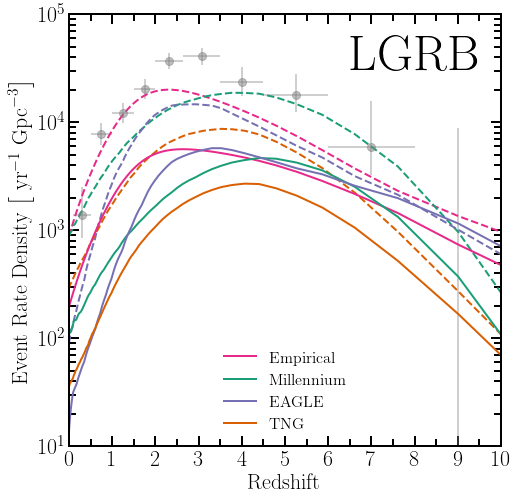

In [31]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0, 0, 1, 1])

set_axis(ax)

for SFH in SFH_names:
    if SFH == "empirical":
        ax.plot(redshift, np.sum(event_rates[SFH]["tidal_LGRB"], axis=0),  color=colours[SFH], lw=2, ls="--")
    elif SFH == "millimillennium":
        ax.plot(redshift, np.sum(event_rates[SFH]["tidal_LGRB"], axis=0),  color=colours[SFH], lw=2, ls="--")
    else:
        ax.plot(redshift, np.sum(event_rates[SFH]["tidal_LGRB"], axis=0),  color=colours[SFH], lw=2, ls="--")

for SFH in SFH_names:
    if SFH == "empirical":
        ax.plot(redshift, np.sum(event_rates[SFH]["LGRB"], axis=0), label="Empirical", color=colours[SFH], lw=2)
    elif SFH == "millimillennium":
        ax.plot(redshift, np.sum(event_rates[SFH]["LGRB"], axis=0), label="Millennium", color=colours[SFH], lw=2)
    else:
        ax.plot(redshift, np.sum(event_rates[SFH]["LGRB"], axis=0), label=SFH, color=colours[SFH], lw=2)


        
    
ax.legend(frameon=False, fontsize=16, loc=8)
ax.set_xlabel("Redshift")
ax.set_ylabel(r"Event Rate Density $\left[\textrm{ yr}^{-1} \textrm{ Gpc}^{-3}\right]$")
ax.set_yscale("log")
ax.set_xlim(0,10)
ax.set_ylim(1e1, 1e5)

# luminosity and opening angle correction already applied to the stored observations!!!
obs = observations['LGRB']
ax.errorbar(np.array(obs['mean_z']),
            np.array(obs['rate'])*h**3, 
            xerr=[obs['lower_z'],obs['upper_z']],
            yerr=[obs['lower_rate']*h**3, obs['upper_rate']*h**3],
            fmt="o",
            ms=8,
            alpha=0.5,
            color="grey")

ax.text(6.5, 3e4, r"LGRB", fontsize=50)

plt.savefig("images/pdf/LGRB+tidal_norm_obs.pdf", bbox_inches='tight', transparent=True)
plt.savefig("images/png/LGRB+tidal_norm_obs.png", dpi=150, bbox_inches='tight', transparent=True)

# PISN (Figure 10)

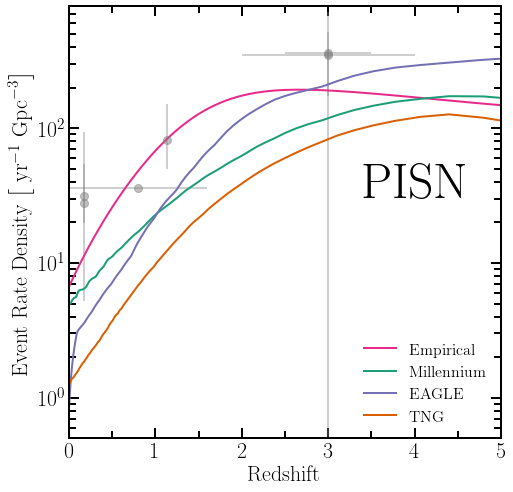

In [16]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0, 0, 1, 1])

set_axis(ax)

for SFH in SFH_names:
    if SFH == "empirical":
        ax.plot(redshift, np.sum(event_rates[SFH]["PISNe"], axis=0), label="Empirical", color=colours[SFH], lw=2)
    elif SFH == "millimillennium":
        ax.plot(redshift, np.sum(event_rates[SFH]["PISNe"], axis=0), label="Millennium", color=colours[SFH], lw=2)
    else:
        ax.plot(redshift, np.sum(event_rates[SFH]["PISNe"], axis=0), label=SFH, color=colours[SFH], lw=2)



obs = observations['PISN']
ax.errorbar(np.array(obs['mean_z']),
            np.array(obs['rate'])*h**3, 
            xerr=[obs['lower_z'],obs['upper_z']],
            yerr=[obs['lower_rate']*h**3, obs['upper_rate']*h**3],
            fmt="o",
            ms=8,
            alpha=0.5,
            color="grey")


ax.legend(frameon=False, fontsize=16, loc=4)
ax.set_xlabel("Redshift")
ax.set_ylabel(r"Event Rate Density $\left[\textrm{ yr}^{-1} \textrm{ Gpc}^{-3}\right]$")
ax.set_yscale("log")
ax.set_xlim(0,5)
ax.set_ylim(5e-1, 8e2)

ax.text(3.4, 3e1, r"PISN", fontsize=50)

plt.savefig("images/png/PISN_obs.png", dpi=150, bbox_inches='tight')
plt.savefig("images/pdf/PISN_obs.pdf", bbox_inches='tight')

# BBH (Figure 11)

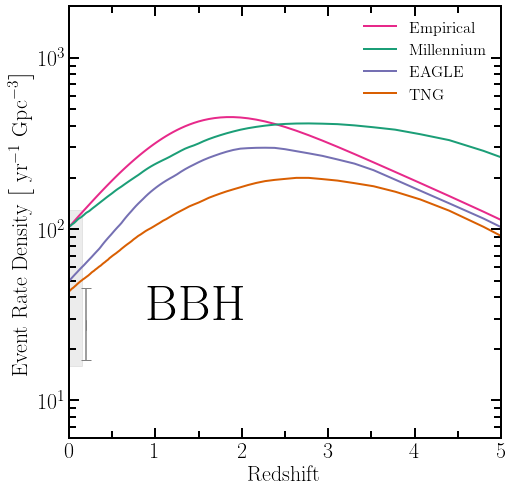

In [32]:
#obs_path = "../data/observations/BBH.csv"
#obs = pd.read_csv(obs_path, delimiter=",")
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0, 0, 1, 1])

set_axis(ax)

for SFH in SFH_names:
    if SFH == "empirical":
        ax.plot(redshift, np.sum(event_rates[SFH]["BBH"], axis=0), label="Empirical", color=colours[SFH], lw=2)
    elif SFH == "millimillennium":
        ax.plot(redshift, np.sum(event_rates[SFH]["BBH"], axis=0), label="Millennium", color=colours[SFH], lw=2)
    else:
        ax.plot(redshift, np.sum(event_rates[SFH]["BBH"], axis=0), label=SFH, color=colours[SFH], lw=2)


    
ax.legend(frameon=False, fontsize=16, loc=1)
ax.set_xlabel("Redshift")
ax.set_ylabel(r"Event Rate Density $\left[\textrm{ yr}^{-1} \textrm{ Gpc}^{-3}\right]$")
ax.set_yscale("log")
ax.set_xlim(0,5)
ax.set_ylim(6e0, 2e3)



obs = observations['BBH']


# Non-evolving merger rate
top = np.max(obs['rate'][1:4]+obs['upper_rate'][1:4])
bottom = np.min(obs['rate'][1:4]-obs['lower_rate'][1:4])

ax.fill_between([0,0.15], 
                (top)*h**3,
                (bottom)*h**3, 
                alpha=0.15, 
                color="grey")

# Evolving merger rate

top = np.argmax(obs['rate'][-3:]+obs['upper_rate'][-3:])
bottom = np.argmin(obs['rate'][-3:]-obs['lower_rate'][-3:])

mean_rate = (obs['rate'][-3:][top]-obs['lower_rate'][-3:][top] + obs['rate'][bottom]+obs['upper_rate'][-3:][bottom])/2
to_top = obs['rate'][-3:][top]+obs['upper_rate'][-3:][top] - mean_rate
to_bottom = mean_rate - (obs['rate'][-3:][bottom]-obs['lower_rate'][-3:][bottom])

ax.errorbar(0.2,
            mean_rate*h**3, 
            xerr=[[0],[0]],
            yerr=[[to_bottom*h**3], [to_top*h**3]],
            fmt="",
            ms=8,
            color="grey",
            capsize=5)


ax.text(0.9, 3e1, r"BBH", fontsize=50)

plt.savefig("images/png/BHBH_obs.png", dpi=150, bbox_inches='tight')
plt.savefig("images/pdf/BHBH_obs.pdf", bbox_inches='tight')

# BHNS (Figure 13)

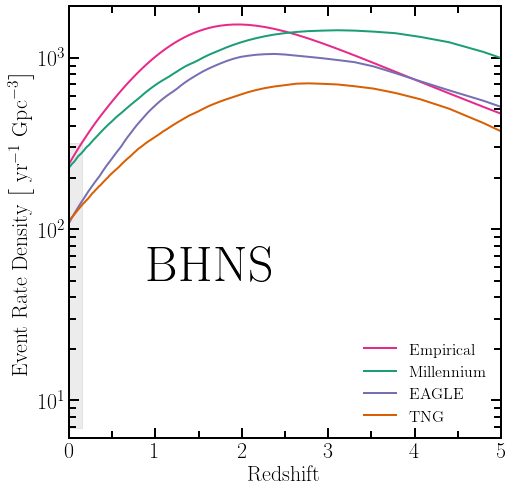

In [34]:
#obs_path = "../data/observations/BHNS.csv"
#obs = pd.read_csv(obs_path, delimiter=",")
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0, 0, 1, 1])

set_axis(ax)

for SFH in SFH_names:
    if SFH == "empirical":
        ax.plot(redshift, np.sum(event_rates[SFH]["BHNS"], axis=0), label="Empirical", color=colours[SFH], lw=2)
    elif SFH == "millimillennium":
        ax.plot(redshift, np.sum(event_rates[SFH]["BHNS"], axis=0), label="Millennium", color=colours[SFH], lw=2)
    else:
        ax.plot(redshift, np.sum(event_rates[SFH]["BHNS"], axis=0), label=SFH, color=colours[SFH], lw=2)


    
ax.legend(frameon=False, fontsize=16, loc=4)
ax.set_xlabel("Redshift")
ax.set_ylabel(r"Event Rate Density $\left[\textrm{ yr}^{-1} \textrm{ Gpc}^{-3}\right]$")
ax.set_yscale("log")
ax.set_xlim(0,5)
ax.set_ylim(6e0, 2e3)

obs = observations['BHNS']

# Non-evolving merger rate
top = np.max(obs['rate'][1:4]+obs['upper_rate'][1:4])
bottom = np.min(obs['rate'][1:4]-obs['lower_rate'][1:4])

ax.fill_between([0,0.15], 
                (top)*h**3,
                (bottom)*h**3, 
                alpha=0.15, 
                color="grey")

ax.text(0.9, 5e1, r"BHNS", fontsize=50)

plt.savefig("images/png/BHNS_obs.png", dpi=150, bbox_inches='tight')
plt.savefig("images/pdf/BHNS_obs.pdf", bbox_inches='tight')

# BNS (Figure 14)

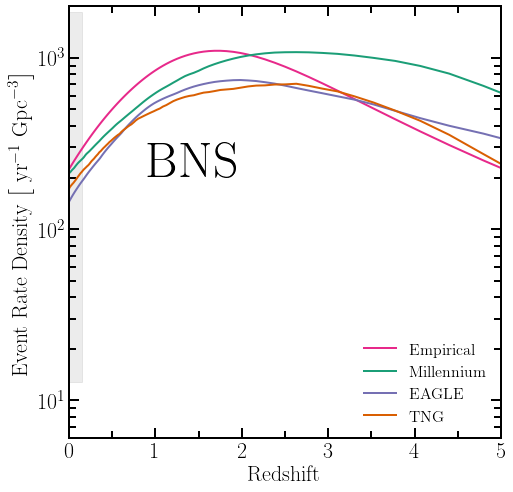

In [19]:
#obs_path = "../data/observations/BNS.csv"
#obs = pd.read_csv(obs_path, delimiter=",")
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0, 0, 1, 1])

set_axis(ax)

for SFH in SFH_names:
    if SFH == "empirical":
        ax.plot(redshift, np.sum(event_rates[SFH]["BNS"], axis=0), label="Empirical", color=colours[SFH], lw=2)
    elif SFH == "millimillennium":
        ax.plot(redshift, np.sum(event_rates[SFH]["BNS"], axis=0), label="Millennium", color=colours[SFH], lw=2)
    else:
        ax.plot(redshift, np.sum(event_rates[SFH]["BNS"], axis=0), label=SFH, color=colours[SFH], lw=2)


    
plt.legend(frameon=False, fontsize=16, loc=4)
plt.xlabel("Redshift")
plt.ylabel(r"Event Rate Density $\left[\textrm{ yr}^{-1} \textrm{ Gpc}^{-3}\right]$")
plt.yscale("log")
plt.xlim(0,5)
ax.set_ylim(6e0, 2e3)

obs = observations['BNS']

# Non-evolving merger rate
top = np.max(obs['rate'][1:4]+obs['upper_rate'][1:4])
bottom = np.min(obs['rate'][1:4]-obs['lower_rate'][1:4])

ax.fill_between([0,0.15], 
                (top)*h**3,
                (bottom)*h**3, 
                alpha=0.15, 
                color="grey")

ax.text(0.9, 2e2, r"BNS", fontsize=50)

plt.savefig("images/png/BNS_obs.png", dpi=150, bbox_inches='tight')
plt.savefig("images/pdf/BNS_obs.pdf", bbox_inches='tight')

In [20]:
data.close()